In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

In [26]:
df = pd.read_csv('bbc_data.csv', sep=';', index_col=0)

In [27]:
df

,index,title,description,image,keywords,syno_s,syno_m,syno_l,category,channel,language,release_date,duration_sec,topic,spacied_syno_l,processed_syno_l,processed_syno_l_one_string,k_means
0,0,BBC Proms,Australian tenor Stuart Skelton is joined by L...,https://ichef.bbci.co.uk/images/ic/{recipe}/p0...,"BBC, iPlayer, TV, BBC Proms, 2021: Last Night ...",Australian tenor Stuart Skelton is joined by L...,Australian tenor Stuart Skelton is joined by L...,Katie Derham hosts continued live coverage fro...,Music,bbc_radio_three,False,9pm 11 Sep 2021,5247,"['music', 'from-the-archives']",Katie Derham hosts continued live coverage fro...,"['Katie', 'Derham', 'host', 'continue', 'live'...",Katie Derham host continue live coverage Royal...,11
1,1,Port,"Previously unseen music from the series Port, ...",https://ichef.bbci.co.uk/images/ic/{recipe}/p0...,"BBC, iPlayer, TV, Port, Series 5: Episode 4","Previously unseen music from the series Port, ...",Julie Fowlis a’ lìbhrigeadh ceòl bhon t-sreath...,Bidh Druthag Bheag Eile a’ tarraing ri chèile ...,Music,bbc_alba,False,9 Jul 2020,1037,['music'],Bidh Druthag Bheag Eile a’ tarraing ri chèile ...,"['Bidh', 'Druthag', 'Bheag', 'Eile', 'tarraing...",Bidh Druthag Bheag Eile tarraing ri chèile pìo...,7
2,2,"Sit Down, Stand Up with Greg James",Tom Holland and Greg James cold call celebrity...,https://ichef.bbci.co.uk/images/ic/{recipe}/p0...,"BBC, iPlayer, TV, Sit Down, Stand Up with Greg...",Tom Holland and Greg James cold call celebrity...,Tom Holland and Greg James cold call celebrity...,Tom Holland and Greg James cold call celebrity...,Entertainment,bbc_radio_one,False,10 Feb 2022,611,"['music', 'entertainment']",Tom Holland and Greg James cold call celebrity...,"['Tom', 'Holland', 'Greg', 'James', 'cold', 'c...",Tom Holland Greg James cold celebrity friend f...,10
3,3,Ceiliúradh na Féile Pádraig,John Toal and Pauline Scanlon introduce an eve...,https://ichef.bbci.co.uk/images/ic/{recipe}/p0...,"BBC, iPlayer, TV, Ceiliúradh na Féile Pádraig",John Toal and Pauline Scanlon introduce an eve...,John Toal and Pauline Scanlon introduce an eve...,John Toal and Pauline Scanlon introduce an eve...,Music,bbc_two_northern_ireland_digital,False,17 Mar 2017,3538,['music'],John Toal and Pauline Scanlon introduce an eve...,"['John', 'Toal', 'Pauline', 'Scanlon', 'introd...",John Toal Pauline Scanlon introduce evening mu...,7
4,4,Songs of Praise,Claire McCollum explores Edinburgh and shares ...,https://ichef.bbci.co.uk/images/ic/{recipe}/p0...,"BBC, iPlayer, TV, Songs of Praise, Edinburgh",Claire McCollum explores Edinburgh and shares ...,Claire McCollum goes on a Christian heritage t...,Claire McCollum explores Edinburgh and discove...,Music,bbc_one,False,1:15pm 20 Feb 2022,2044,"['music', 'lifestyle']",Claire McCollum explores Edinburgh and discove...,"['Claire', 'McCollum', 'explore', 'Edinburgh',...",Claire McCollum explore Edinburgh discover ric...,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3777,3777,Models: Street to Catwalk,Kyra’s late arrival puts her modelling career ...,https://ichef.bbci.co.uk/images/ic/{recipe}/p0...,"BBC, iPlayer, TV, Models: Street to Catwalk, S...",Kyra’s late arrival puts her modelling career ...,Kyra jeopardises her modelling career by turni...,How will Kyra cope after a train malfunction m...,Documentary,bbc_three,Contains some strong language and some upsetti...,8 Aug 2021,1843,['documentaries'],How will Kyra cope after a train malfunction m...,"['Kyra', 'cope', 'train', 'malfunction', 'make...",Kyra cope train malfunction make hour crucial ...,9
3789,3789,Death On The I-95,Returning to the US to find out what happened ...,https://ichef.bbci.co.uk/images/ic/{recipe}/p0...,"BBC, iPlayer, TV, Death On The I-95",Returning to the US to find out what happened ...,Following a report on the growing problem of o...,Drug overdose is now the main cause of death f...,Documentary,bbc_three,Contains some strong language and upsetting sc...,24 Oct 2018,342

In [28]:
X = np.array(df['syno_l'])

In [29]:
text_data = X
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(text_data, show_progress_bar=True)


Batches:   0%|          | 0/73 [00:00<?, ?it/s]

In [31]:
X = np.array(embeddings)

In [32]:
cos_sim_data = pd.DataFrame(cosine_similarity(X))

In [34]:
cos_sim_data.to_csv('cosine_similarity.csv', sep=';')

In [ ]:
def give_recommendations(index, print_recommendation = False,print_recommendation_plots= False,print_genres =False):
  index_recomm =cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:6]
  movies_recomm =  df['title'].loc[index_recomm].values
  result = {'Movies':movies_recomm,'Index':index_recomm}
  if print_recommendation==True:
    print('The watched movie is this one: %s \n'%(df['title'].loc[index]))
    k=1
    for movie in movies_recomm:
      print('The number %i recommended movie is this one: %s \n'%(k,movie))
  if print_recommendation_plots==True:
    print('The plot of the watched movie is this one:\n %s \n'%(df['syno_l'].loc[index]))
    k=1
    for q in range(len(movies_recomm)):
      plot_q = df['syno_l'].loc[index_recomm[q]]
      print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
      k=k+1
  if print_genres==True:
    print('The genres of the watched movie is this one:\n %s \n'%(df['category'].loc[index]))
    k=1
    for q in range(len(movies_recomm)):
      plot_q = df['category'].loc[index_recomm[q]]
      print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
      k=k+1
  return result

## Extra

In [13]:
X = np.array(embeddings)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

,0,1,2,3,4
0,6.319744,-3.844085,0.564944,1.786039,0.298949
1,8.570337,7.570889,0.519748,-0.380185,-1.694762
2,1.971906,2.796431,-0.139007,-0.496200,7.006109
3,7.165137,-0.143935,-0.869640,3.542727,2.705534
4,2.466050,-1.356688,1.892754,3.008918,-2.516998


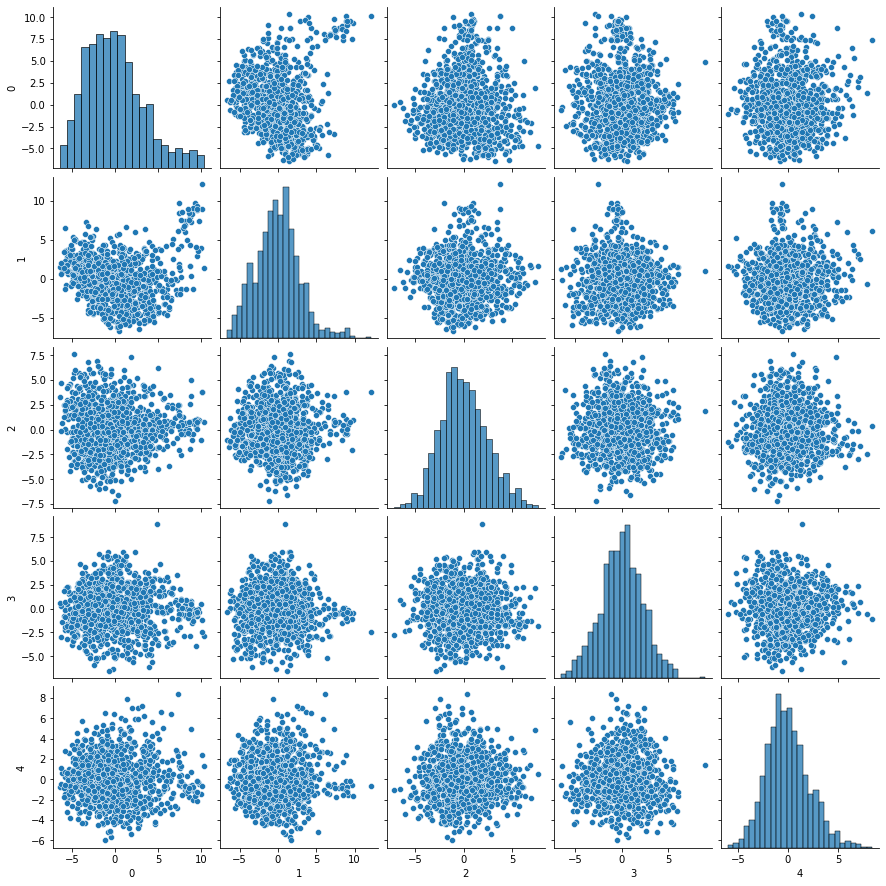

In [14]:
sns.pairplot(pca_data)

In [18]:
cos_sim_data = pd.DataFrame(cosine_similarity(X))
def give_recommendations(index,print_recommendation = False,print_recommendation_plots= False,print_genres =False):
  index_recomm =cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:6]
  movies_recomm =  df['title'].loc[index_recomm].values
  result = {'Movies':movies_recomm,'Index':index_recomm}
  if print_recommendation==True:
    print('The watched movie is this one: %s \n'%(df['title'].loc[index]))
    k=1
    for movie in movies_recomm:
      print('The number %i recommended movie is this one: %s \n'%(k,movie))
  if print_recommendation_plots==True:
    print('The plot of the watched movie is this one:\n %s \n'%(df['syno_l'].loc[index]))
    k=1
    for q in range(len(movies_recomm)):
      plot_q = df['syno_l'].loc[index_recomm[q]]
      print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
      k=k+1
  if print_genres==True:
    print('The genres of the watched movie is this one:\n %s \n'%(df['category'].loc[index]))
    k=1
    for q in range(len(movies_recomm)):
      plot_q = df['category'].loc[index_recomm[q]]
      print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
      k=k+1
  return result

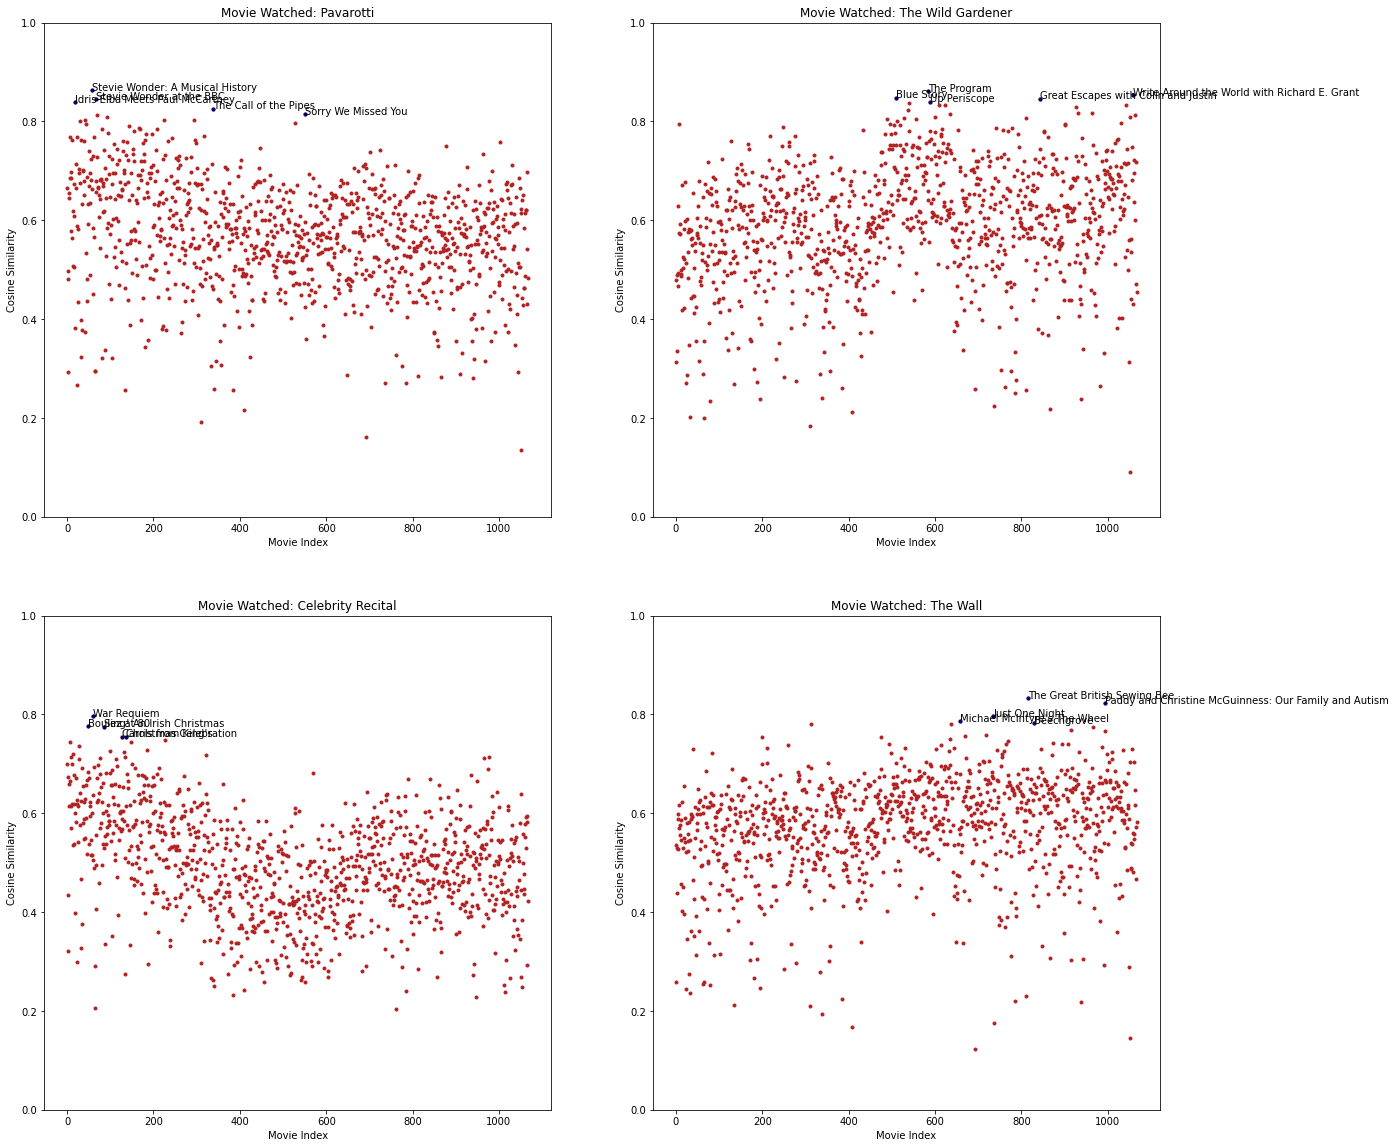

In [19]:
plt.figure(figsize=(20,20))
for q in range(1,5):
  plt.subplot(2,2,q)
  index = np.random.choice(np.arange(0,len(X)))
  to_plot_data = cos_sim_data.drop(index,axis=1)
  plt.plot(to_plot_data.loc[index],'.',color='firebrick')
  recomm_index = give_recommendations(index)
  x = recomm_index['Index']
  y = cos_sim_data.loc[index][x].tolist()
  m = recomm_index['Movies']
  plt.plot(x,y,'.',color='navy',label='Recommended Movies')
  plt.title('Movie Watched: '+ df['title'].loc[index])
  plt.xlabel('Movie Index')
  k=0
  for x_i in x:
    plt.annotate('%s'%(m[k]),(x_i,y[k]),fontsize=10)
    k=k+1

  plt.ylabel('Cosine Similarity')
  plt.ylim(0,1)

In [24]:
len(df)

1069

In [20]:
cos_sim_data = pd.DataFrame(cosine_similarity(X))

In [23]:
index_recomm =cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:6]
index_recomm

[815, 993, 735, 659, 830]

In [21]:
cos_sim_data

,0,1,2,3,4,5,6,7,8,9,...,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068
0,1.000000,0.464569,0.456215,0.759457,0.752888,0.817963,0.844283,0.833293,0.624325,0.714856,...,0.487134,0.743753,0.525584,0.698751,0.641966,0.710750,0.319045,0.718647,0.502010,-0.030931
1,0.464569,1.000000,0.276400,0.500826,0.409278,0.324603,0.260997,0.318547,0.332594,0.532213,...,0.335896,0.366563,0.399878,0.325234,0.346789,0.294538,0.236123,0.378064,0.363347,0.405325
2,0.456215,0.276400,1.000000,0.515068,0.463887,0.565514,0.456465,0.480797,0.404655,0.434049,...,0.401226,0.602706,0.529370,0.472489,0.466311,0.510674,0.580161,0.651826,0.547533,-0.005699
3,0.759457,0.500826,0.515068,1.000000,0.622450,0.738313,0.668563,0.714047,0.395446,0.621673,...,0.352468,0.636178,0.422422,0.538581,0.490707,0.632458,0.299671,0.715726,0.506368,0.030272
4,0.752888,0.409278,0.463887,0.622450,1.000000,0.705579,0.671373,0.769527,0.730229,0.689653,...,0.653462,0.697659,0.614347,0.714175,0.718306,0.610209,0.417038,0.643725,0.552976,-0.125090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,0.710750,0.294538,0.510674,0.632458,0.610209,0.748964,0.830154,0.752911,0.579650,0.649838,...,0.574165,0.834809,0.578741,0.655517,0.684310,1.000000,0.510379,0.577357,0.533500,-0.244248
1065,0.319045,0.236123,0.580161,0.299671,0.417038,0.419393,0.389596,0.391106,0.517140,0.414134,...,0.685027,0.525624,0.611856,0.508165,0.642403,0.510379,1.000000,0.435496,0.525967,-0.015409
1066,0.718647,0.378064,0.651826,0.715726,0.643725,0.785868,0.623649,0.699654,0.542085,0.576500,...,0.449417,0.704721,0.585331,0.549676,0.573219,0.577357,0.435496,1.000000,0.504124,0.039496
1067,0.502010,0.363347,0.547533,0.506368,0.552976,0.614974,0.529156,0.539970,0.467082,0.576908,...,0.419482,0.538895,0.533493,0.566295,0.524049,0.533500,0.525967,0.504124,1.000000,-0.091281
